In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import datetime
import matplotlib.pyplot as plt

In [2]:
# СЛЕДУЮЩИЕ 3 ЯЧЕЙКИ ЭТО ПРОСТО ОБРАБОТКА ДАННЫХ
stocks = pd.read_csv('MCFTR.csv', header = 0, sep = ';', index_col = 'TRADEDATE', usecols = ['TRADEDATE', 'CLOSE'])
bonds = pd.read_csv('RUCBITR.csv', header = 0, sep = ';', index_col = 'TRADEDATE', usecols = ['TRADEDATE', 'CLOSE'])
stocks['CLOSE'] = stocks['CLOSE'].str.replace(',', '.').astype(float)
bonds['CLOSE'] = bonds['CLOSE'].str.replace(',', '.').astype(float)

In [3]:
stocks.index = pd.to_datetime(stocks.index, format='%d.%m.%Y')
bonds.index = pd.to_datetime(bonds.index, format='%d.%m.%Y')

In [4]:
df1 = stocks.merge(bonds, how = 'inner', on = 'TRADEDATE', suffixes=('_stocks', '_bonds'))
df1.reset_index(inplace = True, names = 'DATE')

In [9]:
# ТУТ ФУНКЦИЯ, МОЖЕШЬ МЕНЯТЬ ДЕНЬГИ ЕСЛИ ХОЧЕШЬ
money = 100
def toropkin_invest_half(df, money, target, change_quantile):
    df['AMOUNT_stocks'] = np.nan
    df['AMOUNT_bonds'] = np.nan
    df['AMOUNT_stocks'] = money/df.iloc[0]['CLOSE_stocks']
    df['AMOUNT_bonds'] = 0
    df['POSITION_bonds'] = 0
    df['INVESTMENTS'] = df['AMOUNT_stocks'] * df['CLOSE_stocks'] + df['AMOUNT_bonds'] * df['CLOSE_bonds']
    amount_money = [money*target]
    i = 0
    for j in range(1, df.shape[0]):
        if df['DATE'][j] >= (df['DATE'][0] + pd.DateOffset(months=i)):
            i += 6
            if (df['INVESTMENTS'][j] > amount_money[-1]) and (df.at[j - 1, 'POSITION_bonds'] <= (1 - change_quantile)):
                df.at[j, 'POSITION_bonds'] = df.at[j - 1, 'POSITION_bonds'] + change_quantile
                df.at[j, 'AMOUNT_bonds'] = df.at[j - 1, 'INVESTMENTS'] * df.at[j, 'POSITION_bonds'] / df.at[j - 1, 'CLOSE_bonds']
                df.at[j, 'AMOUNT_stocks'] = df.at[j - 1, 'INVESTMENTS'] * (1 - df.at[j, 'POSITION_bonds']) / df.at[j - 1, 'CLOSE_stocks']
                amount_money.append(amount_money[-1] * target)
            #тут код
            elif (df['INVESTMENTS'][j] < target*amount_money[-1]) and (df.at[j - 1, 'POSITION_bonds'] >= change_quantile):
                df.at[j, 'POSITION_bonds'] = df.at[j - 1, 'POSITION_bonds'] - change_quantile
                df.at[j, 'AMOUNT_bonds'] = df.at[j - 1, 'INVESTMENTS'] * df.at[j, 'POSITION_bonds'] / df.at[j - 1, 'CLOSE_bonds']
                df.at[j, 'AMOUNT_stocks'] = df.at[j - 1, 'INVESTMENTS'] * (1 - df.at[j, 'POSITION_bonds']) / df.at[j - 1, 'CLOSE_stocks']
                amount_money.append(amount_money[-1] * target)
            else:
                df.at[j, 'POSITION_bonds'] = df.at[j - 1, 'POSITION_bonds']
                df.at[j, 'AMOUNT_bonds'] = df.at[j - 1, 'AMOUNT_bonds']
                df.at[j, 'AMOUNT_stocks'] = df.at[j - 1, 'AMOUNT_stocks']
                amount_money.append(amount_money[-1] * target)
        else:
            df.at[j, 'POSITION_bonds'] = df.at[j - 1, 'POSITION_bonds']
            df.at[j, 'AMOUNT_bonds'] = df.at[j - 1, 'AMOUNT_bonds']
            df.at[j, 'AMOUNT_stocks'] = df.at[j - 1, 'AMOUNT_stocks']
        
        df.at[j, 'INVESTMENTS'] = df.at[j, 'AMOUNT_stocks'] * df.at[j, 'CLOSE_stocks'] + df.at[j, 'AMOUNT_bonds'] * df.at[j, 'CLOSE_bonds']
    df.drop(['CLOSE_stocks', 'CLOSE_bonds', 'AMOUNT_stocks', 'AMOUNT_bonds', 'POSITION_bonds'], axis=1, inplace=True)
    df.set_index('DATE', inplace = True)
    return df
    
def toropkin_invest_full(df, money, target, change_quantile):
    df['AMOUNT_stocks'] = np.nan
    df['AMOUNT_bonds'] = np.nan
    df['AMOUNT_stocks'] = money/df.iloc[0]['CLOSE_stocks']
    df['AMOUNT_bonds'] = 0
    df['POSITION_bonds'] = 0
    df['INVESTMENTS'] = df['AMOUNT_stocks'] * df['CLOSE_stocks'] + df['AMOUNT_bonds'] * df['CLOSE_bonds']
    amount_money = [money*target]
    i = 0
    for j in range(1, df.shape[0]):
        if df['DATE'][j] >= (df['DATE'][0] + pd.DateOffset(years=i)):
            i += 1
            if (df['INVESTMENTS'][j] > amount_money[-1]) and (df.at[j - 1, 'POSITION_bonds'] <= (1 - change_quantile)):
                df.at[j, 'POSITION_bonds'] = df.at[j - 1, 'POSITION_bonds'] + change_quantile
                df.at[j, 'AMOUNT_bonds'] = df.at[j - 1, 'INVESTMENTS'] * df.at[j, 'POSITION_bonds'] / df.at[j - 1, 'CLOSE_bonds']
                df.at[j, 'AMOUNT_stocks'] = df.at[j - 1, 'INVESTMENTS'] * (1 - df.at[j, 'POSITION_bonds']) / df.at[j - 1, 'CLOSE_stocks']
                amount_money.append(amount_money[-1] * target)
            #тут код
            elif (df['INVESTMENTS'][j] < target*amount_money[-1]) and (df.at[j - 1, 'POSITION_bonds'] >= change_quantile):
                df.at[j, 'POSITION_bonds'] = df.at[j - 1, 'POSITION_bonds'] - change_quantile
                df.at[j, 'AMOUNT_bonds'] = df.at[j - 1, 'INVESTMENTS'] * df.at[j, 'POSITION_bonds'] / df.at[j - 1, 'CLOSE_bonds']
                df.at[j, 'AMOUNT_stocks'] = df.at[j - 1, 'INVESTMENTS'] * (1 - df.at[j, 'POSITION_bonds']) / df.at[j - 1, 'CLOSE_stocks']
                amount_money.append(amount_money[-1] * target)
            else:
                df.at[j, 'POSITION_bonds'] = df.at[j - 1, 'POSITION_bonds']
                df.at[j, 'AMOUNT_bonds'] = df.at[j - 1, 'AMOUNT_bonds']
                df.at[j, 'AMOUNT_stocks'] = df.at[j - 1, 'AMOUNT_stocks']
                amount_money.append(amount_money[-1] * target)
        else:
            df.at[j, 'POSITION_bonds'] = df.at[j - 1, 'POSITION_bonds']
            df.at[j, 'AMOUNT_bonds'] = df.at[j - 1, 'AMOUNT_bonds']
            df.at[j, 'AMOUNT_stocks'] = df.at[j - 1, 'AMOUNT_stocks']
        
        df.at[j, 'INVESTMENTS'] = df.at[j, 'AMOUNT_stocks'] * df.at[j, 'CLOSE_stocks'] + df.at[j, 'AMOUNT_bonds'] * df.at[j, 'CLOSE_bonds']
    df.drop(['CLOSE_stocks', 'CLOSE_bonds', 'AMOUNT_stocks', 'AMOUNT_bonds', 'POSITION_bonds'], axis=1, inplace=True)
    df.set_index('DATE', inplace = True)
    return df

In [11]:
# ТУТ САМ РАСЧЕТ ПЕРЕМЕННЫХ, ТРОГАЙ ПРОЦЕНТЫ
#YEAR
#TARGET 10
target_10_percent_year_10_change = toropkin_invest_full(df1.copy(), money, target = 1.1, change_quantile = 0.1)
target_10_percent_year_15_change = toropkin_invest_full(df1.copy(), money, target = 1.1, change_quantile = 0.15)
target_10_percent_year_20_change = toropkin_invest_full(df1.copy(), money, target = 1.1, change_quantile = 0.2)
#TARGET 12
target_12_percent_year_10_change = toropkin_invest_full(df1.copy(), money, target = 1.12, change_quantile = 0.1)
target_12_percent_year_15_change = toropkin_invest_full(df1.copy(), money, target = 1.12, change_quantile = 0.15)
target_12_percent_year_20_change = toropkin_invest_full(df1.copy(), money, target = 1.12, change_quantile = 0.2)
#TARGET 15
target_15_percent_year_10_change = toropkin_invest_full(df1.copy(), money, target = 1.15, change_quantile = 0.1)
target_15_percent_year_15_change = toropkin_invest_full(df1.copy(), money, target = 1.15, change_quantile = 0.15)
target_15_percent_year_20_change = toropkin_invest_full(df1.copy(), money, target = 1.15, change_quantile = 0.2)

In [13]:
# ТУТ МОЖНО ПОМЕНЯТЬ НАЗВАНИЕ ЛИНИЙ
#TARGET 10
target_10_percent_year_10_change.name = '10 percent per year target change 10'
target_10_percent_year_15_change.name = '10 percent per year target change 15'
target_10_percent_year_20_change.name = '10 percent per year target change 20'
#TARGET 12
target_12_percent_year_10_change.name = '12 percent per year target change 10'
target_12_percent_year_15_change.name = '12 percent per year target change 15'
target_12_percent_year_20_change.name = '12 percent per year target change 20'
#TARGET 15
target_15_percent_year_10_change.name = '15 percent per year target change 10'
target_15_percent_year_15_change.name = '15 percent per year target change 15'
target_15_percent_year_20_change.name = '15 percent per year target change 20'

In [29]:
#HALF YEAR
#TARGET 5
target_005_percent_half_8_change = toropkin_invest_half(df1.copy(), money, target = 1.05, change_quantile = 0.08)
target_005_percent_half_10_change = toropkin_invest_half(df1.copy(), money, target = 1.05, change_quantile = 0.1)
target_005_percent_half_12_change = toropkin_invest_half(df1.copy(), money, target = 1.05, change_quantile = 0.12)
#TARGET 6
target_006_percent_half_8_change = toropkin_invest_half(df1.copy(), money, target = 1.06, change_quantile = 0.08)
target_006_percent_half_10_change = toropkin_invest_half(df1.copy(), money, target = 1.06, change_quantile = 0.1)
target_006_percent_half_12_change = toropkin_invest_half(df1.copy(), money, target = 1.06, change_quantile = 0.12)
#TARGET 7
target_007_percent_half_8_change = toropkin_invest_half(df1.copy(), money, target = 1.07, change_quantile = 0.08)
target_007_percent_half_10_change = toropkin_invest_half(df1.copy(), money, target = 1.07, change_quantile = 0.1)
target_007_percent_half_12_change = toropkin_invest_half(df1.copy(), money, target = 1.07, change_quantile = 0.12)

In [31]:
#TARGET 5
target_005_percent_half_8_change.name = '5 percent half year target change 8'
target_005_percent_half_10_change.name = '5 percent half year target change 10'
target_005_percent_half_12_change.name = '5 percent half year target change 12'
#TARGET 6
target_006_percent_half_8_change.name = '6 percent half year target change 8'
target_006_percent_half_10_change.name = '6 percent half year target change 10'
target_006_percent_half_12_change.name = '6 percent half year target change 12'
#TARGET 7
target_007_percent_half_8_change.name = '7 percent half year target change 8'
target_007_percent_half_10_change.name = '7 percent half year target change 10'
target_007_percent_half_12_change.name = '7 percent half year target change 12'

In [15]:
# ЭТО ВЫБОР ПЕРЕМЕННОЙ ДЛЯ ГРАФИКА НИЖЕ(КОТОРЫЙ ОДИНОЧНЫЙ), МОЖЕШЬ ПРИРАВНИВАТЬ df К ЛЮБОЙ ИЗ ПЕРЕМЕННЫХ ИЗ 6 ЯЧЕЙКИ
df = target_12_percent_year_15_change

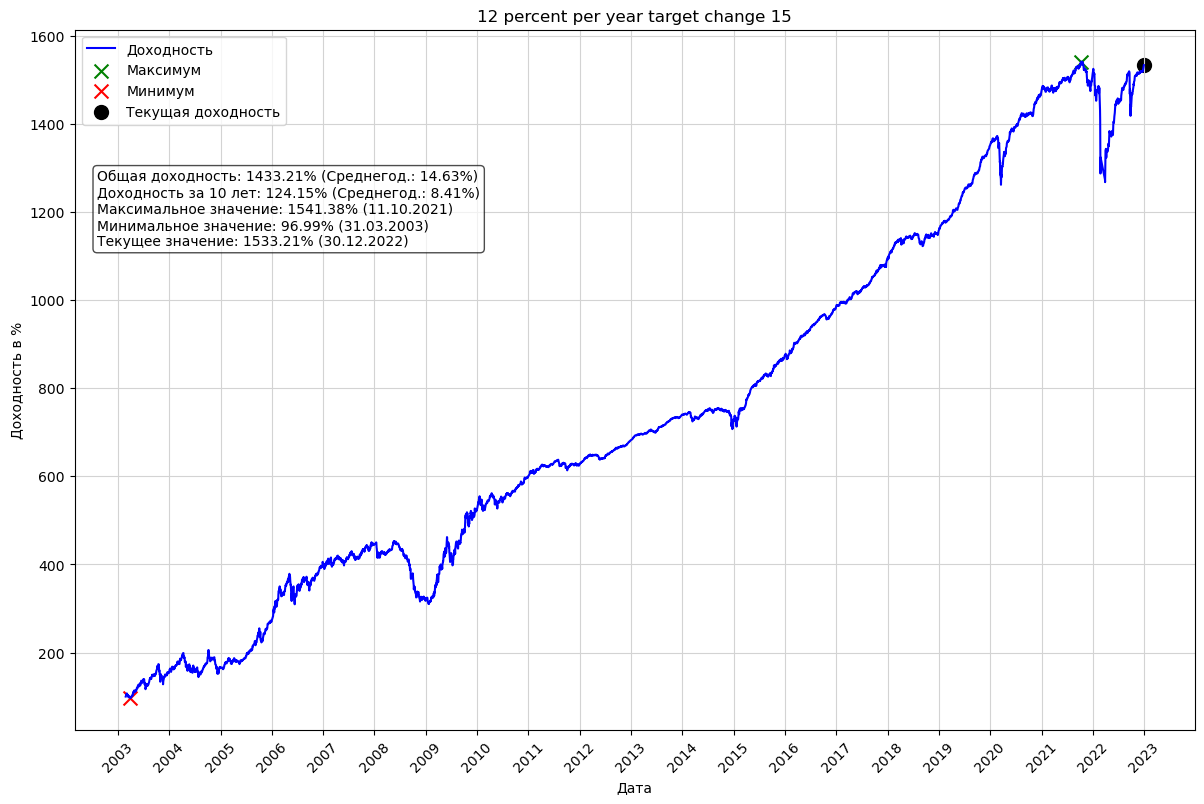

In [17]:
# 16 СТРОКУ ПРОВЕРЯТЬ, ТАМ КОНКРЕТНЫЙ ИНДЕКС, НАДО МЕНЯТЬ В СЛУЧАЕ СМЕНЫ БАЗЫ ДАННЫХ (2455)
plt.figure(figsize=(14, 10))
plt.plot(df.index, df['INVESTMENTS'], label='Доходность', color='blue')
plt.scatter(df['INVESTMENTS'].idxmax(), df['INVESTMENTS'].max(), color='green', marker='x', s=100, label='Максимум')
plt.scatter(df['INVESTMENTS'].idxmin(), df['INVESTMENTS'].min(), color='red', marker='x', s=100, label='Минимум')
plt.scatter(df.index[-1], df.iloc[-1], color='black', marker='o', s=100, label='Текущая доходность')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))
plt.title(df.name)
plt.xlabel("Дата")
plt.ylabel("Доходность в %")
props = dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    f"Общая доходность: {round(df.iloc[-1][0] - 100, 2)}% (Среднегод.: {round(((df.iloc[-1][0] / 100) ** 0.05 - 1)*100, 2)}%)",
    f"Доходность за 10 лет: {round((df.iloc[-1][0] / df.iloc[2455][0]) * 100-100, 2)}% (Среднегод.: {round(((df.iloc[-1][0] / df.iloc[2455][0]) ** 0.1 - 1) * 100, 2)}%)",
    f"Максимальное значение: {round(df['INVESTMENTS'].max(), 2)}% ({df['INVESTMENTS'].idxmax().strftime('%d.%m.%Y')})",
    f"Минимальное значение: {round(df['INVESTMENTS'].min(), 2)}% ({df['INVESTMENTS'].idxmin().strftime('%d.%m.%Y')})",
    f"Текущее значение: {round(df.iloc[-1][0], 2)}% ({df.index[-1].strftime('%d.%m.%Y')})"
))
plt.gca().text(0.02, 0.8, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
plt.legend(loc='upper left')
plt.grid(True, color='lightgrey')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

plt.show()

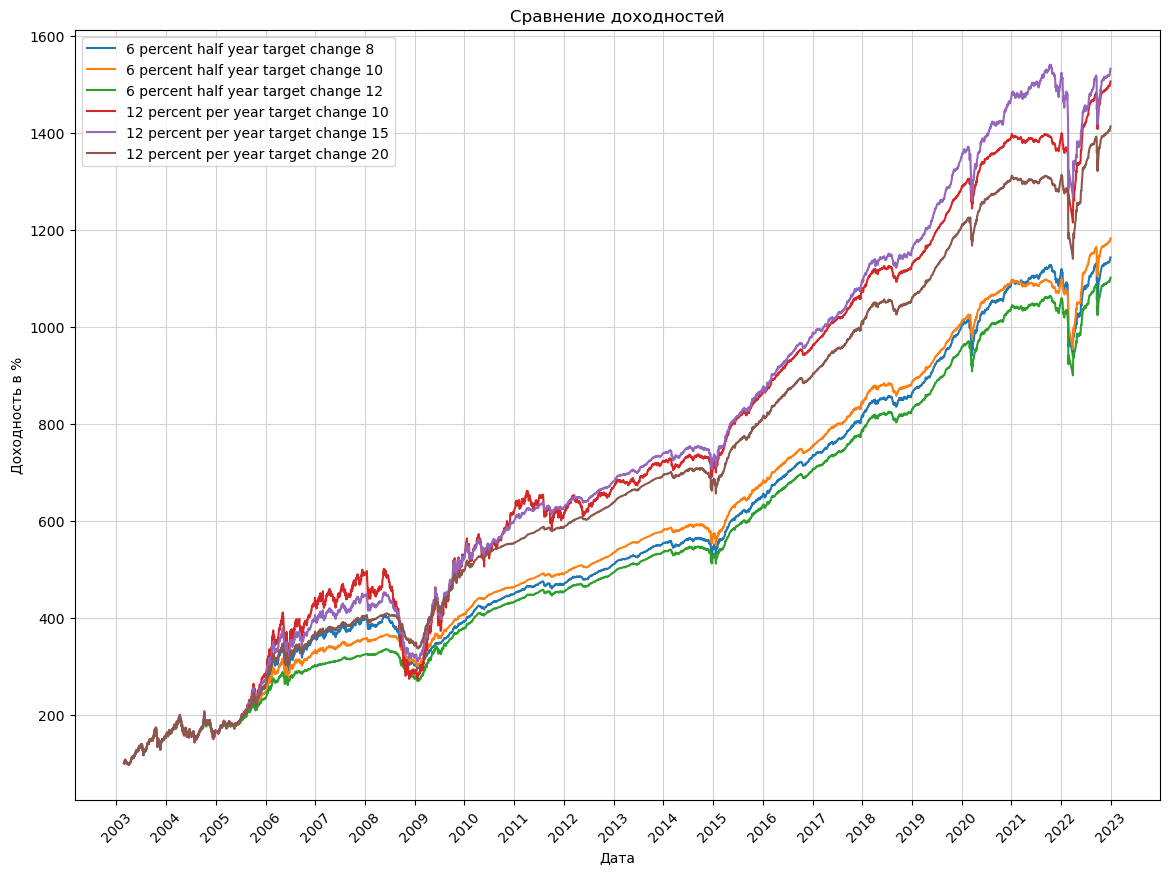

In [37]:
# ТУТ КОМБИНИРОВАННЫЙ ГРАФИК, ДЛЯ СМЕНЫ МЕЖДУ 10 И 15 ГОДАМИ МЕНЯЕМ 4 СТРОКУ(dict = dict1 для 10 лет и dict = dict2 для 15 лет)
#TARGET 10
dict_10 = [target_10_percent_year_10_change, target_10_percent_year_15_change, target_10_percent_year_20_change]
#TARGET 12
dict_12 = [target_12_percent_year_10_change, target_12_percent_year_15_change, target_12_percent_year_20_change]
#TARGET 15
dict_15 =[target_15_percent_year_10_change, target_15_percent_year_15_change, target_15_percent_year_20_change]
#TARGET 5
dict_5 = [target_005_percent_half_8_change, target_005_percent_half_10_change, target_005_percent_half_12_change]
#TARGET 6
dict_6 = [target_006_percent_half_8_change, target_006_percent_half_10_change, target_006_percent_half_12_change]
#TARGET 7
dict_7 = [target_007_percent_half_8_change, target_007_percent_half_10_change, target_007_percent_half_12_change]
dict = dict_6 + dict_12
plt.figure(figsize=(14, 10))
for i in range(len(dict)):
    plt.plot(dict[i].index, dict[i]['INVESTMENTS'], label=dict[i].name)
plt.plot
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))
plt.title("Сравнение доходностей")
plt.xlabel("Дата")
plt.ylabel("Доходность в %")
plt.legend(loc='upper left')
plt.grid(True, color='lightgrey')
plt.show()